# Rappels sur la complexité temporelle

L'exécution d'un programme nécessite d'utiliser plus ou moins les capacités de votre ordinateur. Ceci ce quantifie avec deux facteurs principaux: le temps de calcul et la mémoire occupé lors de l'exécution. Pour être plus performant un programme doit demander le moins de ressource possible à l'ordinateur et donc avoir un temps de calcul court et une petite mémoire occupée.

Pour quantifier les besoins nécessaire à l'éxécution d'un programme, on utilise la complexité. On parle de complexité temporelle lorsqu'il s'agit du temps de réponse, et de complexité spatiale pour l'espace mémoire. Ce paragraphe traitera de la complexité temporelle.

Le temps exact en seconde que prend un programme à effectuer un programme dépend de nombreux facteurs techniques propores à chaque machine. On peut estimer l'influence de l'algorithme sur le temps en considérant que chaque opération élémentaire ( addition, multiplication, comparaison, ... ) représente une unité de coût sans préciser le temps en seconde pour chaque unité de coût. La complexité temporelle est le nombre total d'unité de coût pour l'exécution de cet algorithme.

Enfin on étudie l'évolution de cette complexité en fonction de la taille des données à étudier. En effet l'algorithme ne fera pas le même nombre d'opération selon le problème à traiter par exemple le nombre d'élément d'une liste à trier ou la valeur du nombre à calculer. Lorsqu'on étudie la complexité on étudie donc un équivalent de l'unité de coût en fonction de la taille des données.

Si C(n) est la complexité pour des données de taille n, alors on peut avoir comme résultat :
- $C(n) = O(\log(n))$, complexité logarithmique
- $C(n) = O(n)$, complexité linéaire
- $C(n) = O(n\log(n))$, complexité quasi-linéaire
- $C(n) = O(n^2)$, complexité quadratique
- $C(n) = O(n^k)$, complexité polynomiale
- $C(n) = O(\exp(n))$, complexité exponentielle

Reprenons le programme itératif calculant la puissance $n$-ième d'un nombre $x$

In [1]:
def puissance_iterative(x,n) :
    resultat = 1
    for i in range(n):
        resultat = x*resultat
    return resultat

Et calculons sa complexité en fonction de la puissance $n$

Ce programme commence par affecter 1 à résultat donc on compte 1 unité de coût
Ce programme fait une boucle $n$ fois donc on va multiplier par n le coût suivant:
    dans la boucle le programme effectue une multiplication donc 1 unité de coût
    
La complexité du programme est donc $C(n) = 1 + n\times 1 = O(n)$ c'est une complexité linéaire selon la puissance calculée.

On peut vérifier ce résultat à l'aide du programme ci-dessous qui mesure 1000 fois le temps d'exécution de la fonction puissance_iterative pour les puissance de 2 entre 0 et 99.

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


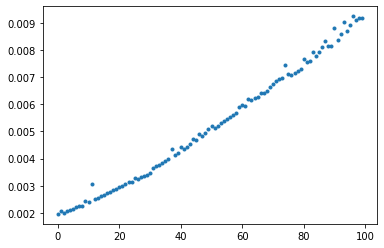

In [3]:
import time
import matplotlib.pyplot as plt
resultat = 100*[0]
for j in range(1000):
    for i in range(100):
        depart = time.clock()
        puissance_iterative(2,i)
        arrive = time.clock()
        resultat[i]=resultat[i]+arrive-depart
    
plt.plot(resultat,'.')
plt.show()

# La complexité temporelle dans le cas d'un programme récursif

Avec un programme itératif nous avons pu estimer la complexité du programme à l'aide d'une expression explicite $C(n)$ est directement une fonction de $n$. En effet l'écriture d'un programme itératif explicite directement toutes les opérations effectuées.

Ce n'est pas le cas pour un programme récursif où par définition le programme s'appelle lui même. A la lecture du code du programme on est seuleument capable d'exprimer la complexité pour une taille $n$ en fonction de la complexité pour une taille inférieure.

Reprenons par exemple le programme récursif calculant aussi la puissance $n$-ième d'un nombre x.

In [4]:
def puissance_recursive(x,n) :
    if n==0 :
        resultat = 1
        return resultat
    else :
        resultat = x*puissance_recursive(x,n-1)
        return resultat

Exprimons sa complexité en lisant la structure du programme.

Si n = 0, alors on affecte 1 au résultat donc $C(0) = 1$

Si n > 0, alors on éffectue toute les opérations pour calculer puissance_recursive(x,n-1) soit $C(n-1)$ et on ajoute une opération en multipliant par x le résultat.
On en déduit $C(n) = C(n-1)+1$

On obtient donc une relation de récurrence qui définit la complexité :

$C(n) = C(n-1)+1$ et $C(0) = 1$

Il s'agit d'une suite arithmétique que l'on peut résoudre avec $C(n) = n+1 = O(n)$
On en déduit donc une complexité linéaire aussi.

Et on peut vérifier ce résultat de la même façon que pour le programme itératif avec le programme suivant.

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


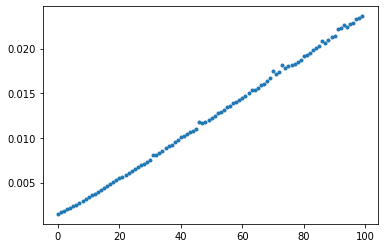

In [4]:
import time
import matplotlib.pyplot as plt
resultat = 100*[0]
for j in range(1000):
    for i in range(100):
        depart = time.clock()
        puissance_recursive(2,i)
        arrive = time.clock()
        resultat[i]=resultat[i]+arrive-depart
    
plt.plot(resultat,'.')
plt.show()

Pour les deux programmes ci-dessus on obtient dans les deux cas une complexité linéaire, on dit que les deux programmes ont une complexité équivalente. Lorsque l'on veut améliorer un programme on utilise un programme ayant le même but avec une complexité inférieure. Prenons l'exemple de la fonction puissance_rapide(x, n) ci-dessous.

Dans le programme ci-dessous x//y renvoi le quotient de la division euclidienne de n par 2, et x%y renvoi le reste de la division euclidienne de x par 2.

In [5]:
def puissance_rapide(x, n):
    if n == 0:
        return 1
    else:
        r = puissance_rapide(x, n // 2)
        if n % 2 == 0:
            return r * r
        else:
            return x * r * r

Evaluons sa complexité en lisant le programme :

si n=0, alors on affecte 1 au résultat donc $C(0) = 1$

si n>0, alors on effectue le nombre d'opération pour calculer puissance_rapide(x, n/2) puis on effectue une multiplication, donc $C(n) = C(n/2) + 1$

On a donc pour $C(n)$ la relation de récurrence $C(n) = C(n/2) + 1$ et $C(0) = 1$. Pour évaluer $C(n)$ on peut effectuer le changement de variable $n=2^k$ donc $C(2^k) = C(2^(k-1)) + 1$ et $C(2^0) = C(0)+1 = 2$. Il s'agit donc d'une suite arithmétique avec $k$ d'où $C(2^k) = k+2$ or $2^k = n$ d'où $k = \log_2(n)$ et $C(n) = \log_2(n)+2$.

Il s'agit donc d'une complexité logarithmique et donc d'un programme plus performant que les précédents pour calculer la puissance n-ième de x. Dans certains cas un fonction récursive permet de diminuer la complexité temporelle de l'algorithme.
Vérifions ce résultat à nouveau.

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


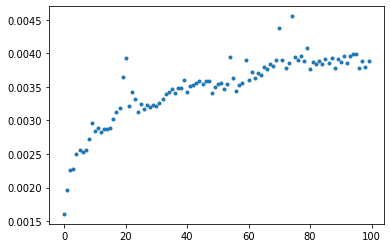

In [6]:
import time
import matplotlib.pyplot as plt
resultat = 100*[0]
for j in range(1000):
    for i in range(100):
        depart = time.clock()
        puissance_rapide(2,i)
        arrive = time.clock()
        resultat[i]=resultat[i]+arrive-depart
    
plt.plot(resultat,'.')
plt.show()

On remarque que la complexité est sub-linéaire, pour s'assurer qu'il s'agit bien d'une complexité logarithmique traçons plutôt le temps d'éxecution en fonction de $\log(n)$ avec :

C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
C:\Users\remib\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


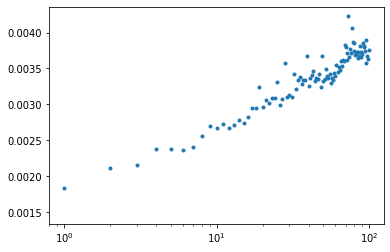

In [7]:
import time
import matplotlib.pyplot as plt
resultat = 100*[0]
for j in range(1000):
    for i in range(100):
        depart = time.clock()
        puissance_rapide(2,i)
        arrive = time.clock()
        resultat[i]=resultat[i]+arrive-depart
        
plt.semilogx(resultat,'.')
plt.show()

## Exercice

En reprenant les programmes ci-dessous écrit pour le sujet précédent évaluer leur complexité temporelle et vérifier votre résultat.

### le calcul de factorielle itératif

In [8]:
def factorielle_classique(n):
    resultat = 1
    for i in range(n):
        resultat = (i+1)*resultat
    return resultat

### le calcul de factorielle récursif

In [10]:
def factorielle_recursive(n):
    if n==1:
        return 1
    else :
        resultat = n*factorielle_recursive(n-1)
        return resultat

Que pouvez-vous conclure sur l'intérêt d'utiliser une fonction récursive par rapport à une fonction itérative pour évaluer la fonction factorielle ?

### la suite définie par récurrence

In [12]:
def u(n):
    if n == 0:
        return 2.
    else:
        return 0.5 * (u(n-1) + 3. / u(n-1))

si on compare au même programme mais écrit légèrement différement suivant

In [15]:
def u(n):
    if n == 0:
        return 2.
    else:
        intermediaire = u(n-1)
        return 0.5 * (intermediaire + 3. / intermediaire)

On en déduit que la récursivité permet d'écrire naturellement les relations de récurrence, mais qu'il faut faire attention à la complexité.

## Exercice

Soit l une liste triée par ordre croissant et x un élément à chercher dans cette liste.

Ecrire un programme récursif qui prend en argument la liste triée l et l'élément à rechercher x et qui renvoie True si x est dans l, et False si x n'est pas dans l. On utilisera une méthode de recherche par dichotomie.

Puis évaluer et vérifier sa complexité.

## Exercice

On considère la suite de Fibonacci définie par :

$F_0 = 0$

$F_1 = 1$

$F_n = F_{n-1}+F_{n-2}$

Écrire une fonction récursive basée sur ces relations qui prend n en argument et renvoie $F_n$.

Quelle est sa complexité ?

Accélérer le calcul de $F_n$ en écrivant plutôt une fonction récursive auxiliaire qui prend en arguments $F_{n−1}$,
$F_n$ et $k > 0$ et renvoie $F_{n+k}$ (on pourra poser $F_{-1} = 1$).

Quelle est la nouvelle complexité ?